In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

df = pd.read_csv('/home/justwantpost/drive/ShapeNetCore.v2/paths_32.csv', header=None, sep='/', dtype=str)

# drop column 0
df = df.drop([0], axis=1)
df.head()

,1,2,3,4,5,6,7,8
0,home,justwantpost,drive,ShapeNetCore.v2,02773838,2970e5486815e72ccd99ccc7ff441abf,models,model_normalized.npy_32.npy 1
1,home,justwantpost,drive,ShapeNetCore.v2,02773838,758dd5af7f18ed9acd99ccc7ff441abf,models,model_normalized.npy_32.npy 1
2,home,justwantpost,drive,ShapeNetCore.v2,02773838,a1822be832091e036afa58a86636d6be,models,model_normalized.npy_32.npy 1
3,home,justwantpost,drive,ShapeNetCore.v2,02773838,93ca5243aa73b5de81157c9325bb0e45,models,model_normalized.npy_32.npy 1
4,home,justwantpost,drive,ShapeNetCore.v2,02773838,6881468dd51c214922022e93ae2b2b5b,models,model_normalized.npy_32.npy 1


In [2]:
from tqdm import tqdm
import numpy as np
from collections import defaultdict

# Initialize a list to collect data before creating the DataFrame
data = defaultdict(list)

for _, row in tqdm(df.iterrows(), total=len(df)):
    
    category = row[5]
    
    file_path = '/' + '/'.join(row.values).strip()[:-2]
    
    # Extend the list with tuples of path, score, and grasp
    data[category].append(file_path)


# Create a DataFrames
for category in data.keys():
    data[category] = pd.DataFrame(data[category], columns=['path'])

# split the data into train and test one by one
X_train = defaultdict(list)
X_test = defaultdict(list)

for category in data.keys():
    tr, te = train_test_split(data[category], test_size=0.2, random_state=42)
    X_train[category] = tr
    X_test[category] = te

# combine
X_train = pd.concat(X_train.values())
X_test = pd.concat(X_test.values())

100%|██████████| 52472/52472 [00:02<00:00, 24705.94it/s]


In [47]:
# add as second column value 1 for all the rows
X_train.insert(1, '1', 1)
X_test.insert(1, '1', 1)

# write to csv with delimiter space 
X_train.to_csv('/home/justwantpost/drive/ShapeNetCore.v2/paths_32_train.csv', index=False, header=False, sep=' ')
X_test.to_csv('/home/justwantpost/drive/ShapeNetCore.v2/paths_32_test.csv', index=False, header=False, sep=' ')

In [7]:
import matplotlib.pyplot as plt

In [10]:
x = np.load('/home/justwantpost/drive/ShapeNetCore.v2/02773838/f5800755a78fc83957be02cb1dc1e62/models/model_normalized.npy_32.npy')
x = x.reshape(-1)

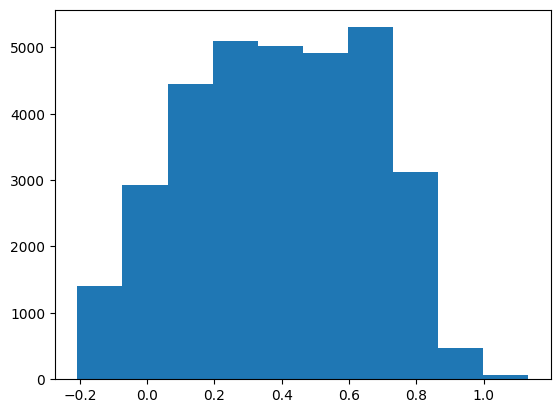

In [11]:
plt.hist(x)
plt.show()

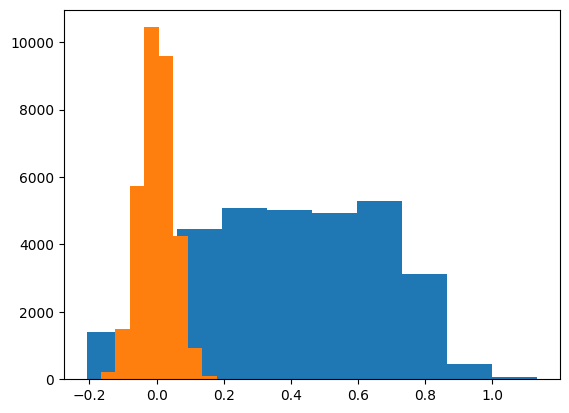

In [16]:
# plt.hist(x + noise)
plt.hist(x)
plt.hist(noise)
plt.show()

In [3]:
import open3d as o3d
import numpy as np
import wandb
from open3d.web_visualizer import draw

Exception in thread GUIMain:
Traceback (most recent call last):
  File "/home/justwantpost/drive/miniconda3/lib/python3.12/threading.py", line 1073, in _bootstrap_inner
    self.run()
  File "/home/justwantpost/drive/miniconda3/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "/home/justwantpost/drive/miniconda3/lib/python3.12/threading.py", line 1010, in run
    self._target(*self._args, **self._kwargs)
  File "/home/justwantpost/drive/miniconda3/lib/python3.12/site-packages/open3d/visualization/async_event_loop.py", line 70, in _thread_main
    app = o3d.visualization.gui.Application.instance
          ^^^^^^^^^^^^^^^^^^^^^
AttributeError: module 'open3d.visualization' has no attribute 'gui'


[Open3D INFO] Resetting default logger to print to terminal.


RuntimeError: Open3D WebVisualizer Jupyter extension is not available. To use WebVisualizer, build Open3D with -DBUILD_JUPYTER_EXTENSION=ON.

In [ ]:
cube_red = o3d.geometry.TriangleMesh.create_box(1, 2, 4)
cube_red.compute_vertex_normals()
cube_red.paint_uniform_color((1.0, 0.0, 0.0))
draw(cube_red)

In [13]:
wandb.init(
    project="grasp-jepa",
    name='denis-test'
)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: kirili4ik. Use `wandb login --relogin` to force relogin


In [14]:
wandb.log({
    "test_mesh": wandb.Object3D('masked_mesh.obj'),
})

In [15]:
wandb.finish()